# Appetizer Task: Hand-Written Digit Classification with Least-Squares

In [1]:
###Do not change the code here
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np

## Appetizer Task
Please read the Appetizer section in the pdf file for the project requirement.

In [2]:
###Do not change the code here
train_data_path = "MNIST_Sub/" + "train_data.txt"
train_labels_path = "MNIST_Sub/" + "train_labels.txt"
test_data_path = "MNIST_Sub/" + "test_data.txt"
test_labels_path = "MNIST_Sub/" + "test_labels.txt"

### the dataset class is provided ###
class Dataset:
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path):
        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path
        
        self.train_data = []
        self.train_labels = []
        self.test_data = []
        self.test_labels = []

    def dataloader(self,):
            '''
            The shape of train data should be (n_samples,28^2)
            '''
            with open(self.train_data_path, "r") as f:
                for line in f:
                    self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
                self.train_data = np.array(self.train_data)

            with open(self.train_labels_path, "r") as f:
                for line in f:
                    self.train_labels.append(int(line.strip()))
                self.train_labels = np.array(self.train_labels)
                

            with open(self.test_data_path, "r") as f:
                for line in f:
                    self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
                self.test_data = np.array(self.test_data)
                

            with open(self.test_labels_path, "r") as f:
                for line in f:
                    self.test_labels.append(int(line.strip()))
                self.test_labels = np.array(self.test_labels)
                
                


In [3]:
###TODO: implement your functions, don't change input 

#add a bias column to x 
def add_bias_column(x):
    bias = np.ones([x.shape[0], 1])
    return np.concatenate((x,bias), 1)

###the main function for solving theta, refer to the project requirement
def classifier(x, y, classes=10):
    #x: train_data
    #y: train_labels
    #classes: # of classes
   
    x = add_bias_column(x)
    theta = np.zeros([x.shape[1], classes])
    
    ### your code starts here ###
    
    #add noise to A in Ax = b
    ATA = (x.T @ x)
    for i in range (ATA.shape[1]):
        for j in range (ATA.shape[0]):
            ATA[i][j] += np.random.uniform(0,0.001) 
            
    #create the b matrix
    #b[i,j] = 1 if y[i] = j; else b[i,j = -1
    b = np.full((y.shape[0], classes), -1)
    for j in range(classes):
        for i in range(y.shape[0]):
            if y[i] == j:
                b[i,j] = 1
        
    #solve for each column of weights (one for each digit) using normal equation
    for i in range(classes):
        theta_i = np.linalg.solve(ATA, x.T @ b[:,i])
        theta[:,i] = theta_i
    
    ### your code ends here ###
    
    return theta
    
#evaluate your solution on test data
def evaluate(x, y, theta):
    x = add_bias_column(x)
    y_pred = np.matmul(x, theta)
    y_pred = np.argmax(y_pred, 1)
    accuracy = (y_pred == y).mean()
    
    return accuracy, y_pred


In [4]:
###Do not change the code###
###load data###
data = Dataset(train_data_path, train_labels_path, test_data_path, test_labels_path)
data.dataloader()
x_train, y_train, x_test, y_test = data.train_data, data.train_labels, data.test_data, data.test_labels
print("# of training samples:", x_train.shape[0])
print("# of testing samples:", x_test.shape[0])

# of training samples: 1000
# of testing samples: 200


In [5]:
###Run your code and print out the test accuracy

theta = classifier(x_train, y_train) ###solve Theta
training_accuracy, y_train_pred = evaluate(x_train, y_train, theta)
print("Training accuracy is:", training_accuracy)

testing_accuracy, y_test_pred = evaluate(x_test, y_test, theta) ###test 
print("Testing accuracy is:", testing_accuracy)

Training accuracy is: 0.984
Testing accuracy is: 0.52


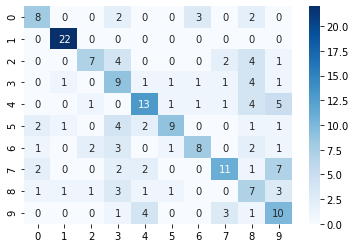

In [6]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()